In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

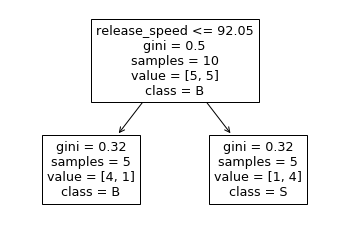

In [2]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt

filename="baseball_svm_data.zip"
df=pd.read_csv(zipfile.ZipFile(filename).open("reg_Sep2019.csv"))
#if we look at the dataframe we see there are a couple of different columns of interest

from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=1)

# Most classifiers in sklearn take two parameters, a list of training instances where each instance 
# has one or more different columns. This is typically called X. But before we train a model, let's reduce
# the dataset a bit. First, let's only look at instances where we have all of the data.
df=df[["release_speed","plate_x","type"]].dropna()
# and let's just reduce this to a two class problem, and get rid of all hits, so we can build a model which
# will predict balls versus strikes
df=df[df["type"]!="X"]
# and let's just look at the first X data points
df_small=df.head(10)
# Now we reduce to just our two columns which contain the features we expect are predictive
X=df_small[["release_speed","plate_x"]]
# And the second list is of outcomes (e.g. classification labels) for each of these instances. This
# is typically called y
y=df_small["type"]

# To actually train the classifier, we call the fit() function
clf.fit(X,y)


from sklearn.tree import plot_tree
plot_tree(clf, feature_names=X.columns, class_names=y.unique());

              precision    recall  f1-score   support

           B       0.42      0.52      0.47        46
           S       0.49      0.39      0.43        54

    accuracy                           0.45       100
   macro avg       0.45      0.46      0.45       100
weighted avg       0.46      0.45      0.45       100



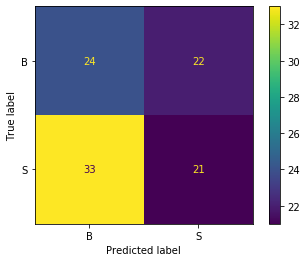

In [3]:
# conda install scikit-learn>=0.22.1

df_large=df.sample(100)
# Now we reduce to just our two columns which contain the features we expect are predictive
X=df_large[["release_speed","plate_x"]]
# And the second list is of outcomes (e.g. classification labels) for each of these instances. This
# is typically called y
y=df_large["type"]



from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X, y)


y_pred=clf.predict(X)

from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

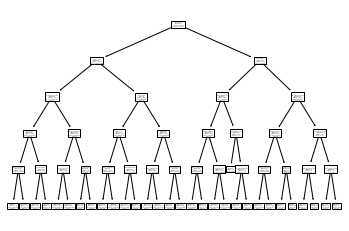

In [4]:
df=pd.read_csv(zipfile.ZipFile(filename).open("reg_Sep2019.csv"))

#df=df[["release_speed","plate_x","type"]].dropna()
df=df[df["type"]!="X"]

#todo use label encoder instead
cols_to_drop=[]
for col in df.columns:
    if (df[col].dtype==object and col!='type'):
        cols_to_drop.append(col)

df=df.drop(cols_to_drop, axis='columns')
df=df.dropna(axis='columns',how='any')

y=df["type"]
X=df.drop('type', axis='columns')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=10)

#X=df[["release_speed","plate_x"]]
# And the second list is of outcomes (e.g. classification labels) for each of these instances. This
# is typically called y
#y=df["type"]


clf=DecisionTreeClassifier(max_depth=5)
# To actually train the classifier, we call the fit() function
clf.fit(X_train,y_train)


from sklearn.tree import plot_tree
plot_tree(clf, feature_names=X.columns, class_names=y.unique());